## Overview

Vector data (i.e. polygons) are commonly used to map geospatial boundaries and delineate land use regions. When exporting land use/cover maps from Geographic Information System (GIS) software, shapefiles (`*.shp`) and projection files (`*.prj`) are usually produced. A projection file is a text file containing information about the coordinate system and map projection. Shapefiles are a text file that contain a polygon or series of polygons defined by geospatial cooridinates. It is therefore important to understand what Coordinate Reference System (CRS) has been used to generate the shapefile and how to convert those coordinates to the CRS you are currently working with.

This notebook will take you through some of the basics for working with shapefiles and projection files and how to use them in a cloud computing environment such as EASI. We will cover:

- Reading in shapefiles and projection files
- Interrogating the shapefile data to find out information such as the CRS, data types, polygon vertices etc
- Reprojection (converting from one CRS to another)
- Mapping and visualiation 

## Geospatial libraries

To map, reproject and visualise the data in this notebook we will use two main libraries:

- [GeoPandas](https://geopandas.org/en/stable/index.html): an open source project to make working with geospatial data in python easier.
- [OSGeo](https://gdal.org/index.html): The Open Source Geospatial Foundation (OSGeo)'s translator library for GDAL which includes many tools for working with geospatial data.
- [pyproj](https://pyproj4.github.io/pyproj/stable/index.html): Python interface to [PROJ](https://proj.org/en/9.4/) (cartographic projections and coordinate transformations library).

### Standard imports

First we will import the python modules required to run this notebook.

In [20]:
# Basic plots
%matplotlib inline
import matplotlib.pyplot as plt

# Geospatial mapping
import geopandas as gpd
from osgeo import osr
from pyproj import CRS

### Polygon mapping

To get familiar with GeoPandas and plotting polygons, let's look at the natural earth 10 m dataset.

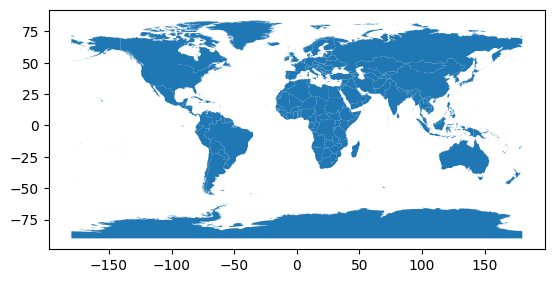

In [2]:
# More maps can be downloweded from here: https://www.naturalearthdata.com/downloads/
world = gpd.read_file('./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

# Visualise the data
ax = world.plot()

### Reprojection
The above map is in a standard map projection. We can see what projection it is by printing out the Coordinate Reference System (CRS)

In [4]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can easily reproject this dataset to a different map projection. For example we can try `EPSG:3857`. For more information on EPSG codes, go to: https://epsg.io/

(-20000000.0, 20000000.0)

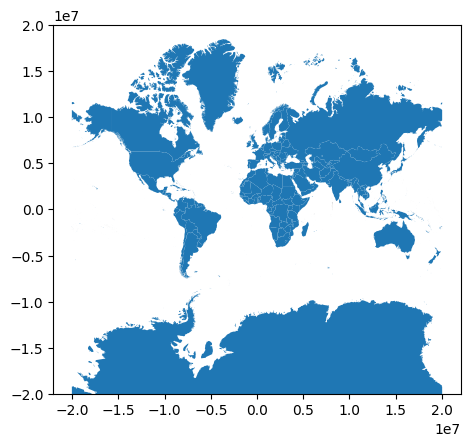

In [5]:
# Reproject
world_reproj = world.to_crs("EPSG:3857")

# Visualise the data
ax = world_reproj.plot()

# Set map limits in the y-dimension
ax.set_ylim(-0.2e8, 0.2e8)

### Polygon selection
We can also subset the dataset based on keywords. For example, let's look at the Vietnam polygon.

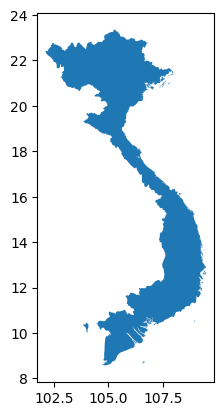

In [6]:
# Search for the country in Vietnamese
vietnam_map = world[world['NAME_VI'] == 'Việt Nam']

# Plot
ax = vietnam_map.plot()

We can also do the same for Australia

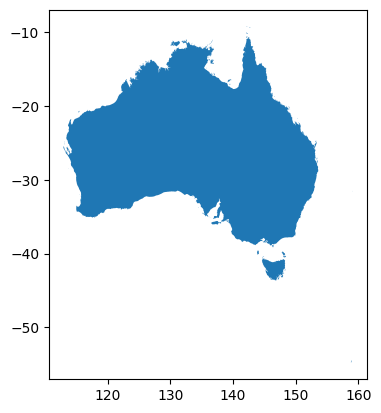

In [8]:
# Search for the country in English
australia_map = world[world['NAME_EN'] == 'Australia']

# Plot
ax = australia_map.plot()

### Interactive mapping

We can also visualise polygons using a the Leaflet plugin using the `.explore()` method.

In [9]:
# View interactive map
vietnam_map.explore()

### Plotting local data
Now let's look at a projection (`.prj`) and shapefile (`.shp`) for the local region of Can Tho, Vietnam.

In [10]:
path = './land_use/'
fn = 'ThuanHoa_Land use inventory 2019'

# We can read in a text file in Python as follows:
prj_text = open(path + fn + '.prj', 'r').read()

print(prj_text)

PROJCS["Transverse_Mercator",GEOGCS["GCS_WGS_1984",DATUM["D_unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105.5],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1]]


Above we see information on the map projection stored in the projection file. It can also be convenient to convert this text into a `proj4` string for later use with shapefiles. For more information on the `proj4` library, see here: https://proj.org/en/9.4/

In [11]:
# Setup spatial reference system object with OSGeo.
srs = osr.SpatialReference()

# Import the projection file data
srs.ImportFromESRI([prj_text])

# Convert to proj4 string
proj4 = srs.ExportToProj4()
print(proj4)

+proj=tmerc +lat_0=0 +lon_0=105.5 +k=0.9999 +x_0=500000 +y_0=0 +ellps=WGS84 +units=m +no_defs


### Reading shapefiles
We can read in a shapefile with the geopandas `gpd.read_file()` method into a geopandas dataframe as follows:

In [12]:
# Read data
gdf = gpd.read_file(path + fn + '.shp')

# Check the datatype
type(gdf)

geopandas.geodataframe.GeoDataFrame

To find out some information about this data we can print the first 5 rows using the `gdf.head(5)` method:

In [13]:
print(gdf.head(5))

   id     thuaid   xaid  shbando  shthua  dientich  dientichpl  maloaidat  \
0   0  760000493  31576        0     493    5058.2         0.0         50   
1   1  760000456  31576        0     456     407.6         0.0         53   
2   2  760000465  31576        0     465    4537.3         0.0         -1   
3   3  760000451  31576        0     451     397.9         0.0         53   
4   4  760000494  31576        0     494    3016.7         0.0          6   

  khloaidat diadanh  dtsd                     tenchu diachi  mdsd2003 kh2003  \
0      None    None     1                        SKC    TKT        33    SKC   
1      None    None     1                        ONT    GDC        26    ONT   
2      None    None     1  ONT(1782.60);CLN(2754.70)    GDC        -1   None   
3      None    None     1                        ONT    GDC        26    ONT   
4      None    None     1                        LUC    GDC         1    LUC   

  mscolor shthuatam dtthocu                             

We can also check the dimensions of the geopands dataframe with:

In [14]:
gdf.shape

(1132, 19)

We can also find out more information about the file by printing the header info:

In [15]:
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1132 non-null   int64   
 1   thuaid      1132 non-null   int64   
 2   xaid        1132 non-null   int64   
 3   shbando     1132 non-null   int64   
 4   shthua      1132 non-null   int64   
 5   dientich    1132 non-null   float64 
 6   dientichpl  1132 non-null   float64 
 7   maloaidat   1132 non-null   int64   
 8   khloaidat   0 non-null      object  
 9   diadanh     0 non-null      object  
 10  dtsd        1132 non-null   int64   
 11  tenchu      1132 non-null   object  
 12  diachi      1132 non-null   object  
 13  mdsd2003    1132 non-null   int64   
 14  kh2003      732 non-null    object  
 15  mscolor     0 non-null      object  
 16  shthuatam   0 non-null      object  
 17  dtthocu     1132 non-null   object  
 18  geometry    1132 non-null   geometry
dty

And check the columns based on datatype

In [16]:
gdf.dtypes

id               int64
thuaid           int64
xaid             int64
shbando          int64
shthua           int64
dientich       float64
dientichpl     float64
maloaidat        int64
khloaidat       object
diadanh         object
dtsd             int64
tenchu          object
diachi          object
mdsd2003         int64
kh2003          object
mscolor         object
shthuatam       object
dtthocu         object
geometry      geometry
dtype: object

### Geometry
Here we can see that the `geometry` column contains data with the a `geometry` datatype. This column contains polygon information. We can access the polygon information with the following:

In [17]:
gdf.head().geometry

0    POLYGON ((540210.764 1070577.703, 540212.264 1...
1    POLYGON ((540278.457 1070634.382, 540300.244 1...
2    POLYGON ((540212.264 1070577.653, 540278.457 1...
3    POLYGON ((540315.403 1070666.045, 540325.424 1...
4    POLYGON ((540301.202 1070519.021, 540315.563 1...
Name: geometry, dtype: geometry

Here we can see that the polygon vertices are not in geographic (lat/lon) cooridinates. To find out more about the map projection we can call the crs method:

In [18]:
gdf.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["WGS 84",DATUM ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

From the data provided, we can see that the Coordinate Operation name is 'unnamed'. However, GeoPandas can try to estimate this for us:

In [19]:
gdf.estimate_utm_crs()

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

This output indicates that the UTM zone 48N (`EPSG:32648`) would be a stuitable projection for this data. If we use the epsg.io website we can see that this is the common UTM zone used for Vietnam: https://epsg.io/32648. However, we can assign the projection information if we know what CRS is being used by the producer of the shapefiles. For example, we can assign the Vietnamese projection (`VN-2000 / TM-3 105-30, EPSG:9209`) with pyproj:

In [21]:
# Read in CRS
crs_utm_vn = CRS.from_user_input(9209)

# We can assign it to the geopandas dataframe:
gdf.crs = crs_utm_vn

In [22]:
gdf.crs

<Projected CRS: EPSG:9209>
Name: VN-2000 / TM-3 105-30
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Vietnam - Bac Ninh, Ha Giang, Ha Tinh, Hai Duong, Hung Yen, Nam Dinh, Soc Trang, Tay Ninh, Thai Binh, Tra Vinh and Vinh Long provinces.
- bounds: (104.33, 9.19, 106.69, 23.4)
Coordinate Operation:
- name: Vietnam TM-3 105-30
- method: Transverse Mercator
Datum: Vietnam 2000
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Reprojecting local data
If we would like to reproject to a more common CRS that uses geographic coorindates we can use to `to_crs()` method as we did before for the world map:

In [23]:
gdf_reproj = gdf.to_crs("EPSG:4326")

In [24]:
# Check the projection
gdf_reproj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
# Check the new geometry, which should be latitude/longitude format
gdf_reproj.head().geometry

0    POLYGON ((105.86823 9.68082, 105.86824 9.68082...
1    POLYGON ((105.86885 9.68133, 105.86904 9.68150...
2    POLYGON ((105.86824 9.68082, 105.86885 9.68133...
3    POLYGON ((105.86918 9.68161, 105.86927 9.68169...
4    POLYGON ((105.86905 9.68028, 105.86918 9.68078...
Name: geometry, dtype: geometry

### Map visualisation
To visualise the data on a map we simply do the following

Text(0.5, 55.331881951415696, 'Longitude (degrees E)')

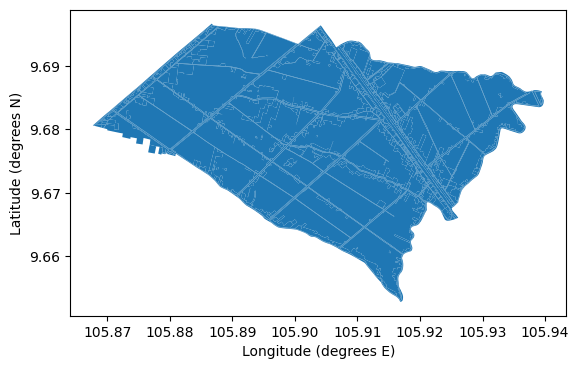

In [26]:
ax = gdf_reproj.plot()
ax.set_ylabel('Latitude (degrees N)')
ax.set_xlabel('Longitude (degrees E)')

And for an interactive map we can use the `.explore()` method:

In [27]:
gdf_reproj.explore()

### Advanced mapping (choropleth maps)
Finally we can create an interactive 'choropleth map' based vector data provided.
A choropleth map is a thematic map used to represent 
numerical data by assign colours to each value.

In [28]:
gdf_reproj.explore(
    column="shthua",  # Make choropleth based on "shthua" column
    tooltip="shthua",  # Show "shthua" value in tooltip (on hover)
    popup=True,  # Show all values in popup (on click)
    tiles="CartoDB Positron",  # Use "CartoDB Positron" map underlay (other options include: CartoDB Voyager and CartoDB Dark Matter).
    cmap="tab20",  # Use "tab20" matplotlib colormap (for more colormaps: # https://matplotlib.org/stable/users/explain/colors/colormaps.html)
    style_kwds=dict(color="black"),  # Use black polygon line boarders
)

### Notebook complete
Congratulations! You have completed this notebook on reprojection and mapping vector data.